# 프로젝트 : CIFAR-10 이미지 생성하기


### CIFAR-10에 대하여 : [출처](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/)

- CIFAR은 Canadian Institute For Advanced Research의 약자
- CIFAR-10 dataset는 CIFAR 연구소의 연구원들이 CIFAR-100 dataset과 함께 개발


- dataset은 개구리, 새, 고양이, 배, 비행기 등 `10개` 등급의 `32×32` 픽셀 `컬러 사진` 60,000장으로 구성
- 일반적인 사진보다 훨씬 작은 이미지
- 컴퓨터 비전 연구를 위한 dataset


- Keras는 cifar10.load_dataset() 함수를 통해 CIFAR10 dataset에 대한 액세스를 제공
- 두 개의 튜플을 반환
    1. `standard training dataset`에 대한 입력 및 출력 요소를 포함
    2. `standard test dataset`에 대한 입력 및 출력 요소를 포함


### GAN의 개념과 이해 : [출처](https://www.samsungsds.com/kr/insights/Generative-adversarial-network-AI-2.html)

>인공지능의 지도학습은 모든 데이터에 대한 정답을 개발자가 알려줘야 학습이 가능하다는 특징 때문에 소요 시간 및 리소스의 한계라는 단점이 있고 궁극적으로 인공지능이 가야 할 방향과도 다소 거리가 있습니다. 따라서, 많은 AI전문가들은 미래의 인공지능은 비지도학습이 이끌어갈 것이며 그 중심에는 **GAN(Generative Adversarial Networks)**이 있을 것이라고 전망합니다.

<br>

**<center>“What I cannot create, I do not understand.”</center>**
<br>
**<center>노벨 물리학상을 받은 미국의 물리학자 Richard Feynman</center>**

<br>

>Richard Feynman의 명언은 비지도학습의 의미와 일맥상통합니다. 즉, 단순히 지도학습에 의해 분류만 하는 것이 아니라, 정답 없이 새로운 것을 지속적으로 생성해 낼 수 있는 능력을 가진다는 것은 그 데이터를 완전히 이해하고 있다는 의미로서 생성할 수 있는 능력을 가지게 되면, 분류하는 것도 자동적으로 쉬워진다는 이야기입니다. 어려운 수학 문제를 혼자서 쉽게 풀 수 있어도, 다른 사람에게 이해시키기 위해 설명하는 것은 그보다 어렵지만 다른 사람에게 설명을 잘 할 수 있다면, 그 문제를 푸는 일은 식은 죽 먹기일 것입니다. 이러한 개념이 **비지도학습의 대표주자인 GAN에 적용**되고 있습니다.

>처음 GAN을 제안한 Ian Goodfellow는 **GAN을 경찰과 위조지폐범 사이의 게임에 비유**했습니다. **위조지폐범은 최대한 진짜 같은 화폐를 만들어(생성) 경찰을 속이기 위해 노력**하고, **경찰은 진짜 화폐와 가짜 화폐를 완벽히 판별(분류)하여 위조지폐범을 검거하는 것을 목표**로 합니다. 이러한 경쟁적인 학습이 지속되다 보면 어느 순간 위조지폐범은 진짜와 다를 바 없는 위조지폐를 만들 수 있게 되고 경찰이 위조지폐를 구별할 수 있는 확률도 가장 헷갈리는 50%로 수렴하게 되어 경찰은 위조지폐와 실제 화폐를 구분할 수 없는 상태에 이르게 됩니다.

>여기서 **경찰은 분류 모델**, **위조지폐범은 생성 모델**을 의미하며, **GAN에는 최대한 진짜 같은 데이터를 생성하려는 생성 모델**과 **진짜와 가짜를 판별하려는 분류 모델**이 각각 존재하여 서로 **적대적(Adversarial)으로 학습**합니다.
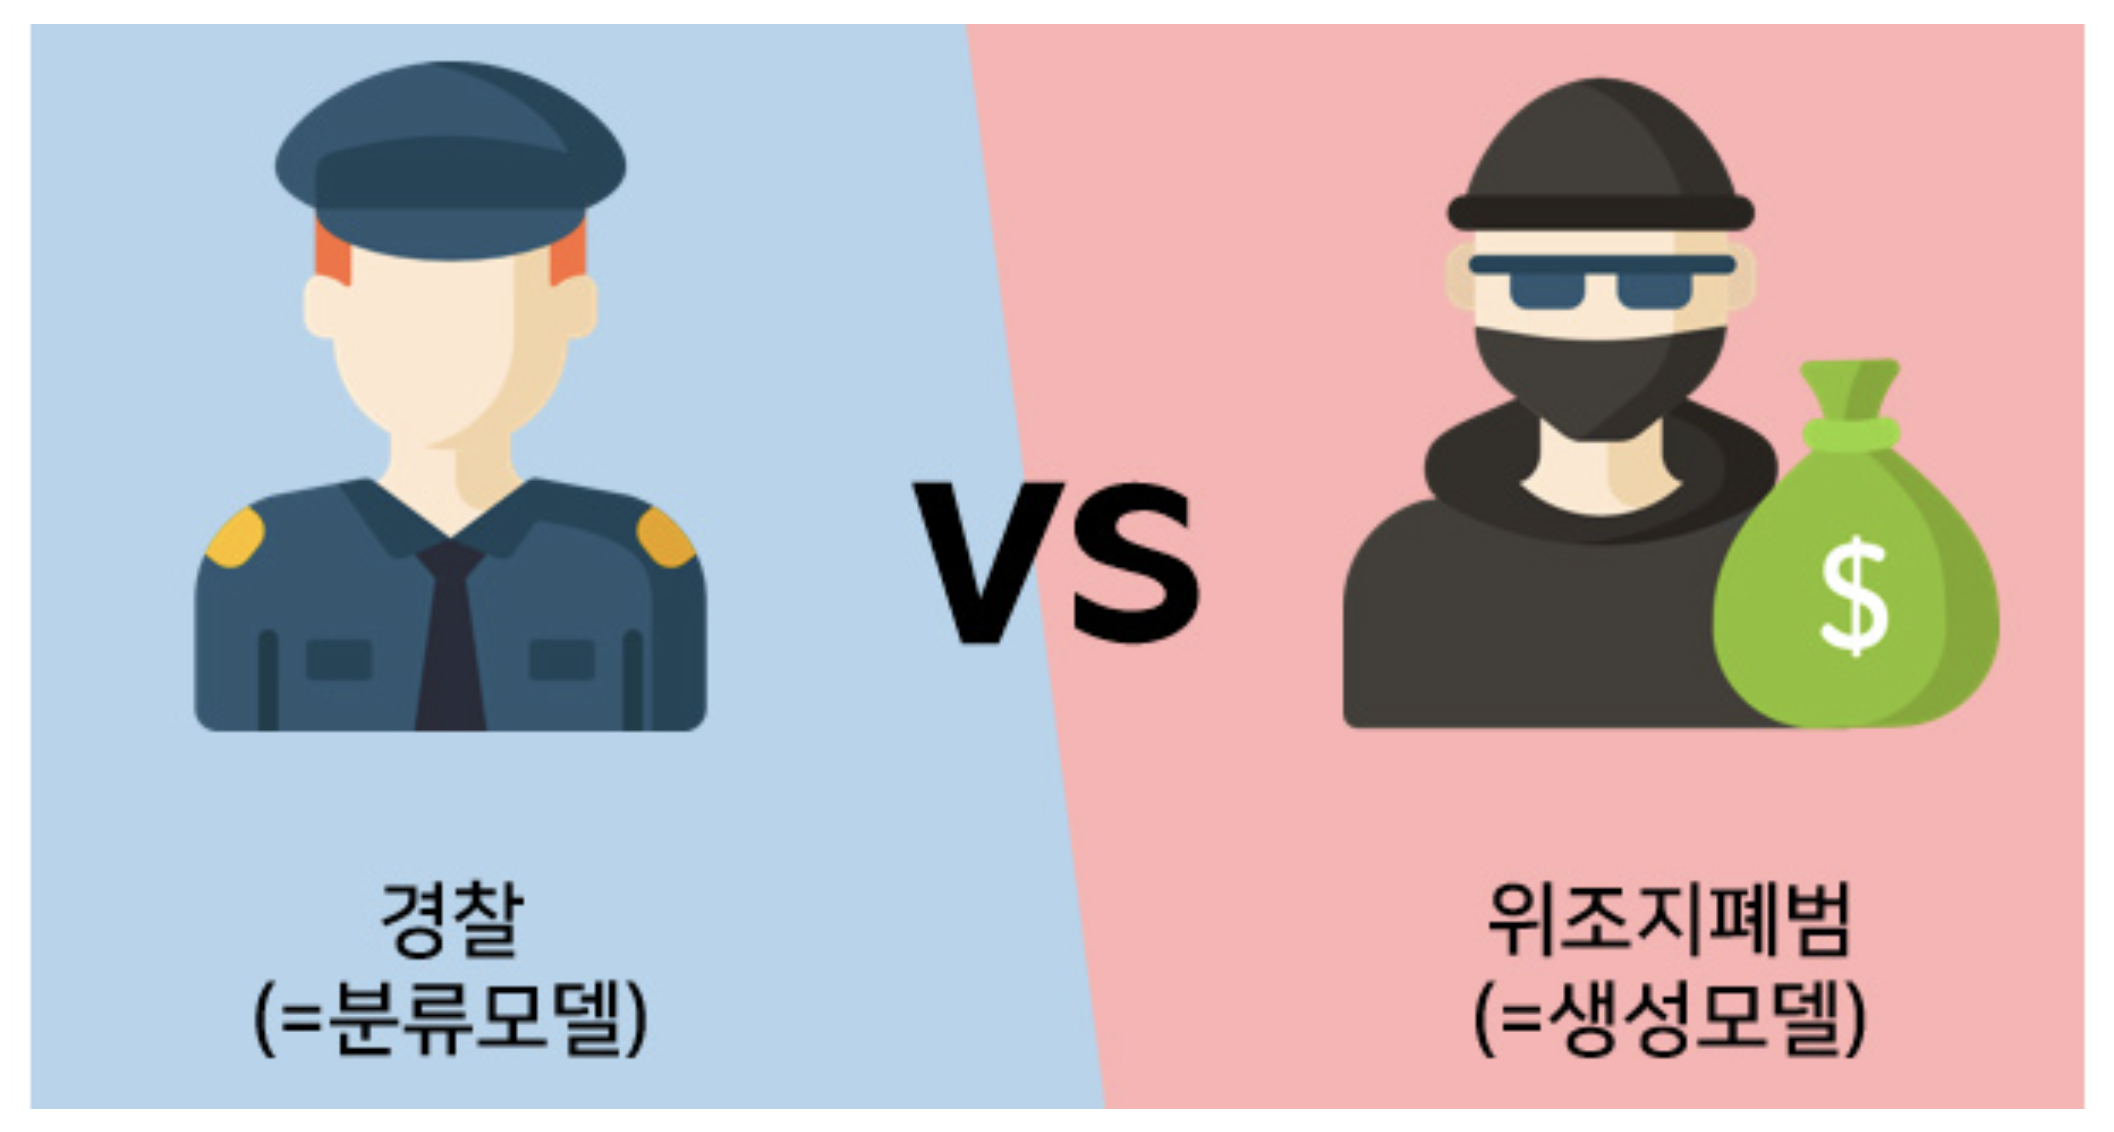
<center>[출처 : https://www.samsungsds.com/kr/insights/Generative-adversarial-network-AI-2.html]</center>

>이러한 GAN의 놀라운 개념을 증명시켜주는 유명한 사례에는 이미지의 산술적인 연산이 있습니다. `안경을 쓴 남자` 이미지를 생성하는 z 에서 `안경을 쓰지 않은 남자` 이미지의 입력인 z 를 빼고 `안경을 쓰지 않은 여자` 이미지에 해당하는 z 를 생성자 G에 넣어주면 `안경을 쓴 여자` 이미지가 아래 그림처럼 생성된다는 것이 밝혀졌습니다.

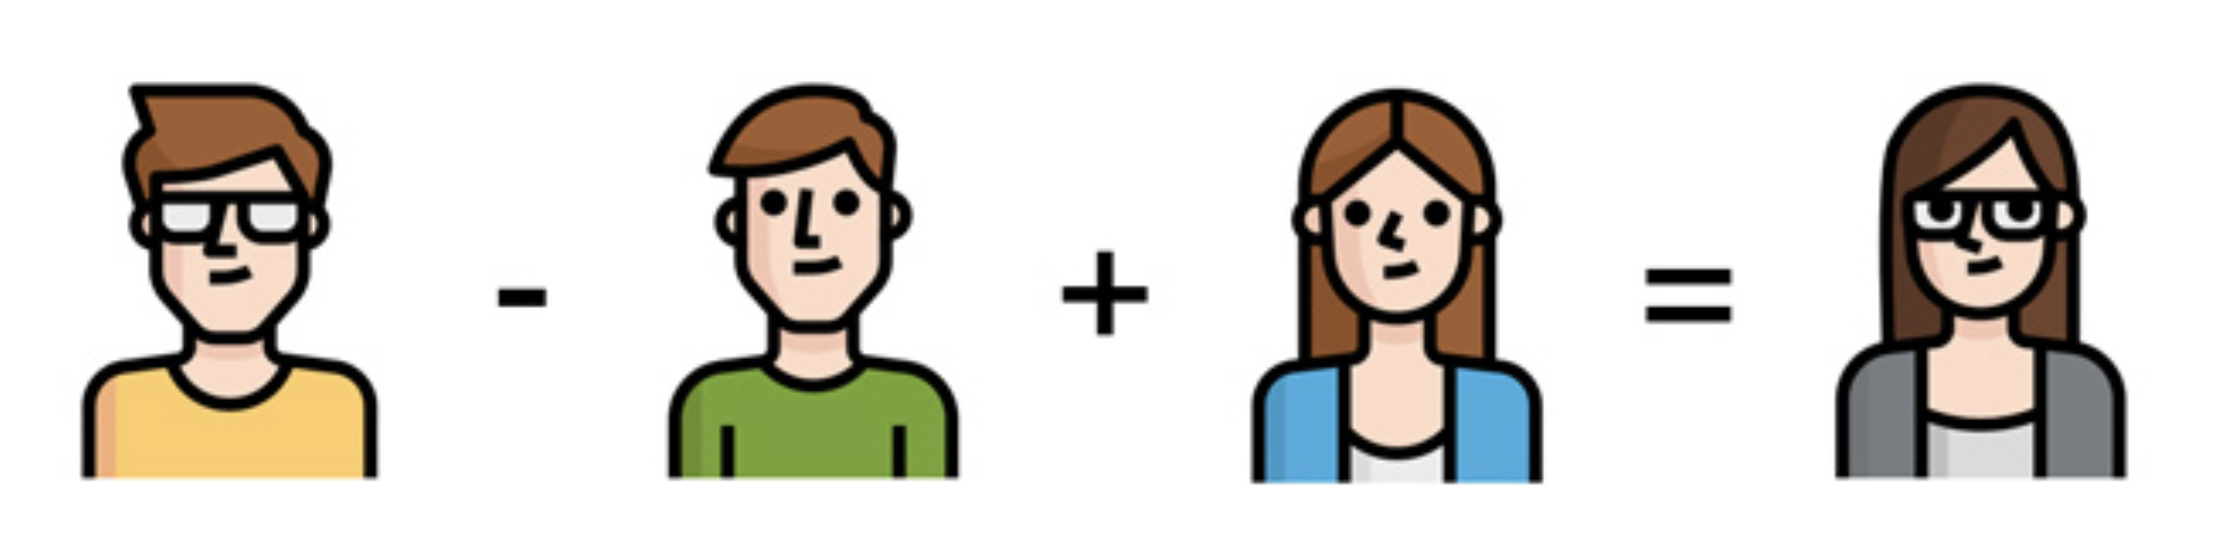
<center>[출처 : https://www.samsungsds.com/kr/insights/Generative-adversarial-network-AI-2.html]</center>



## GAN의 학습 알고리즘

>**적대적 학습**에서는 **분류 모델을 먼저 학습**시킨 후, **생성 모델을 학습**시키는 **과정을 서로 주고받으면서 반복**합니다. **분류 모델의 학습은 크게 두 가지 단계**로 이루어져 있습니다. *`하나는 진짜 데이터를 입력해서 네트워크가 해당 데이터를 진짜로 분류하도록 학습시키는 과정`*이고 *`두 번째는 첫 번째와 반대로 생성 모델에서 생성한 가짜 데이터를 입력해서 해당 데이터를 가짜로 분류하도록 학습하는 과정`*입니다. 이 과정을 통해 분류 모델은 진짜 데이터를 진짜로, 가짜 데이터를 가짜로 분류할 수 있게 됩니다. 분류 모델을 학습시킨 다음에는 **학습된 분류 모델을 속이는 방향으로 생성 모델을 학습**시켜줘야 합니다. *`생성 모델에서 만들어낸 가짜 데이터를 판별 모델에 입력`*하고, *`가짜 데이터를 진짜라고 분류할 만큼 진짜 데이터와 유사한 데이터를 만들어 내도록 생성 모델을 학습`*시킵니다.

>이와 같은 학습과정을 반복하면 **분류 모델과 생성 모델이 서로를 적대적인 경쟁자로 인식하여 모두 발전**하게 됩니다. 결과적으로, 생성 모델은 진짜 데이터와 완벽히 유사한 가짜 데이터를 만들 수 있게 되고 이에 따라 분류 모델은 진짜 데이터와 가짜 데이터를 구분할 수 없게 됩니다. 즉, **GAN**은 **생성 모델은 분류에 성공할 확률을 낮추려** 하고, **분류 모델은 분류에 성공할 확률을 높이려** 하면서 서로가 **서로를 경쟁적으로 발전시키는 구조**를 이루고 있습니다.

### 참고. GAN의 활용 사례와 발전 방향 : [출처](https://www.samsungsds.com/kr/insights/gan.html)

<br>


### Imageio 에 대해서 : [출처](https://github.com/imageio/imageio)

- 애니메이션 이미지, 비디오, 체적 데이터 및 과학 형식을 포함한 광범위한 이미지
- 데이터를 읽고 쓸 수 있는 쉬운 인터페이스를 제공하는 Python 라이브러리.
- 크로스 플랫폼이며 Python 3.7 이상에서 실행되며 설치가 쉽다.

### STEP 1. 작업환경 구성하기
___

- 아래와 같이 디렉토리 구성
```
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/generated_samples
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_checkpoints
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_history
```




- 필요한 라이브러리 설치여부
    - M1 맥북에 imageio, imageio-ffmpeg 는 설치가 안되어 있어서 아래 과정을 거쳐 설치했다.
    - 터미널 창에서 아래 그림과 같은 명령으로 확인
        - 그림은 설치 후 확인 내용이다.
        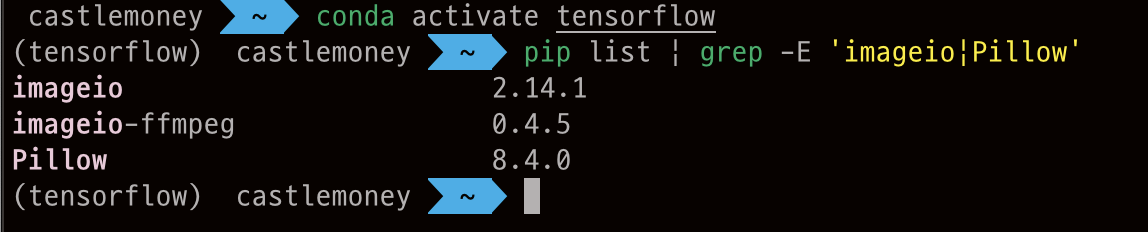
        

- 설치가 안되어 있다면 아래와 같이 확인 후 설치가능
- 아나콘다가 설치된 환경
    - 터미널 창에서 conda search 로 각각 검색 후
    - `conda search imageio`
    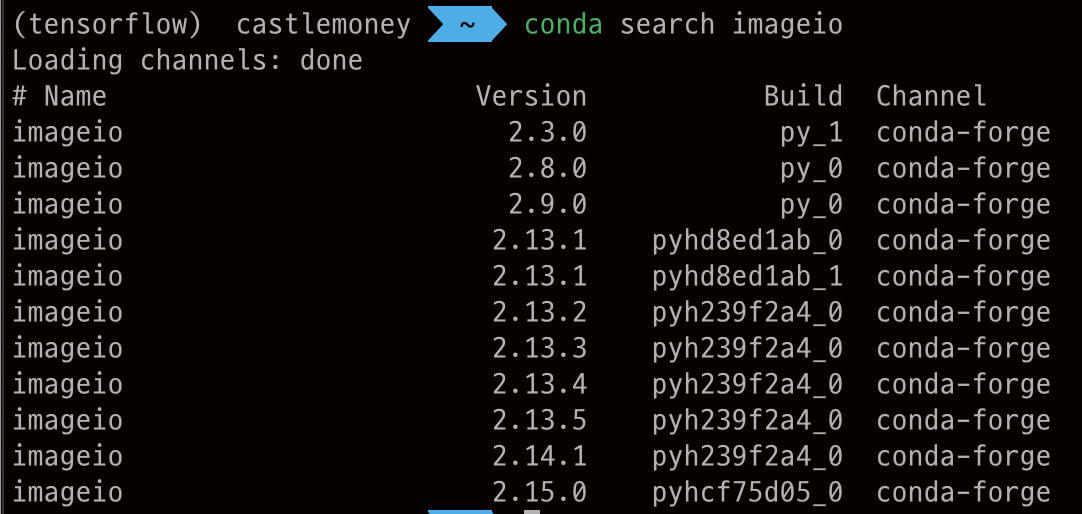
        
    - `conda search imageio-ffmpeg`
    - `conda search Pillow`
    
    
- 위와 같이 확인 을 했다면 아래와 같이 설치
    - `conda install imageio`
    - `conda install imageio-ffmpeg`
    - `conda install Pillow`


- 아나콘다 환경의 장점
    - 기존에 설치되어 있는 python, 패키지, 라이브러리 등의 
    - 각각의 가상환경에 설치되어 있는 버전과의 **의존성(dependencies)** 검사 후 
    - 설치를 한다는 것이 최고의 장점인 것 같다.


- 가능한 conda install 을 활용해서 설치하는 것을 최우선으로 생각한다.

#### 패키지 load

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


### STEP 2. 데이터셋 구성하기
___

### 데이터 셋을 가져오자.
- `fashion_mnist`와는 아래와 같이 달라지는 점이 있다.
    
    - 이미지 데이터의 shape이 (28, 28, 1)에서 (32, 32, 3)으로 변경
        - 생성자, 판별자 모델의 입출력 shape 및 모델 구조에 영향이 있다.

    - 이미지가 단색의 grayscale에서 RGB 3채널의 컬러이미지로 변경
        - 시각화 과정에서 고려할 점이 있다.

    - 입력데이터 전체 차원이 3~4배 증가
        - 학습이 진행되는 양상이 다소 달라진다.

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

print(f'train dataset의 shape : {train_x.shape}')
print(f'test dataset의 shape : {test_x.shape}')

170508288/170498071 [==============================] - 3s 0us/step
train dataset의 shape : (50000, 32, 32, 3)
test dataset의 shape : (10000, 32, 32, 3)


In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


- 이미지를 한번 확인해 보자.

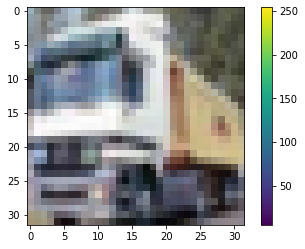

In [4]:
plt.imshow(train_x[1].reshape(32, 32, 3))
plt.colorbar()
plt.show()

- truck 이미지가 확인된다.
    - `plt.colorbar()` 를 이용해 오른쪽에 각 픽셀의 값과 색도 확인
    
    
- 10장의 이미지 확인

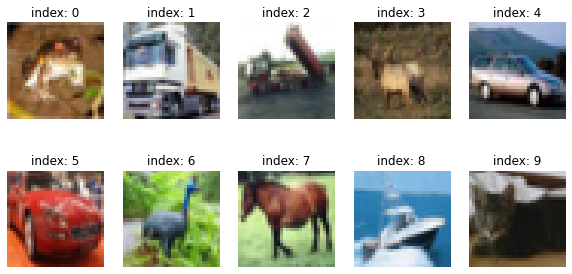

In [5]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

- 랜덤하게 30장의 이미지 확인

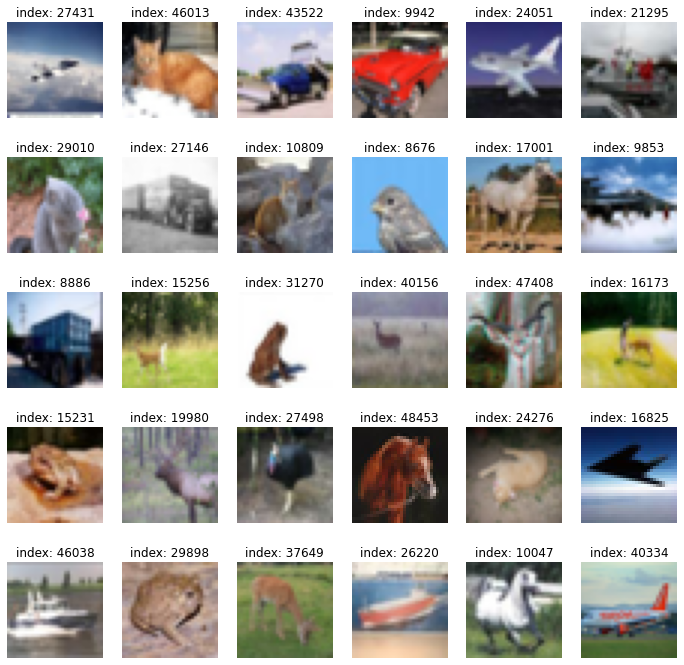

In [6]:
plt.figure(figsize=(12, 12))

for i in range(30):
    # [[YOUR CODE]]
    plt.subplot(5, 6, i+1)
    rd_idx = np.random.randint(1, 50000)
    plt.imshow(train_x[rd_idx].reshape(32, 32, 3))
    plt.title(f'index: {rd_idx}')
    plt.axis('off')
plt.show()

- datasets의 구성 내용은 아래와 같이 확인된다.
    - train 50,000장
    - test 10,000장
    - 32x32 픽셀의 컬러 이미지
    - 각 픽셀은 0~255 사이의 정숫값
    
- datasets의 image, label 현황 : [출처](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)
    - label 은 airplane 부터 `0 ~ 9`
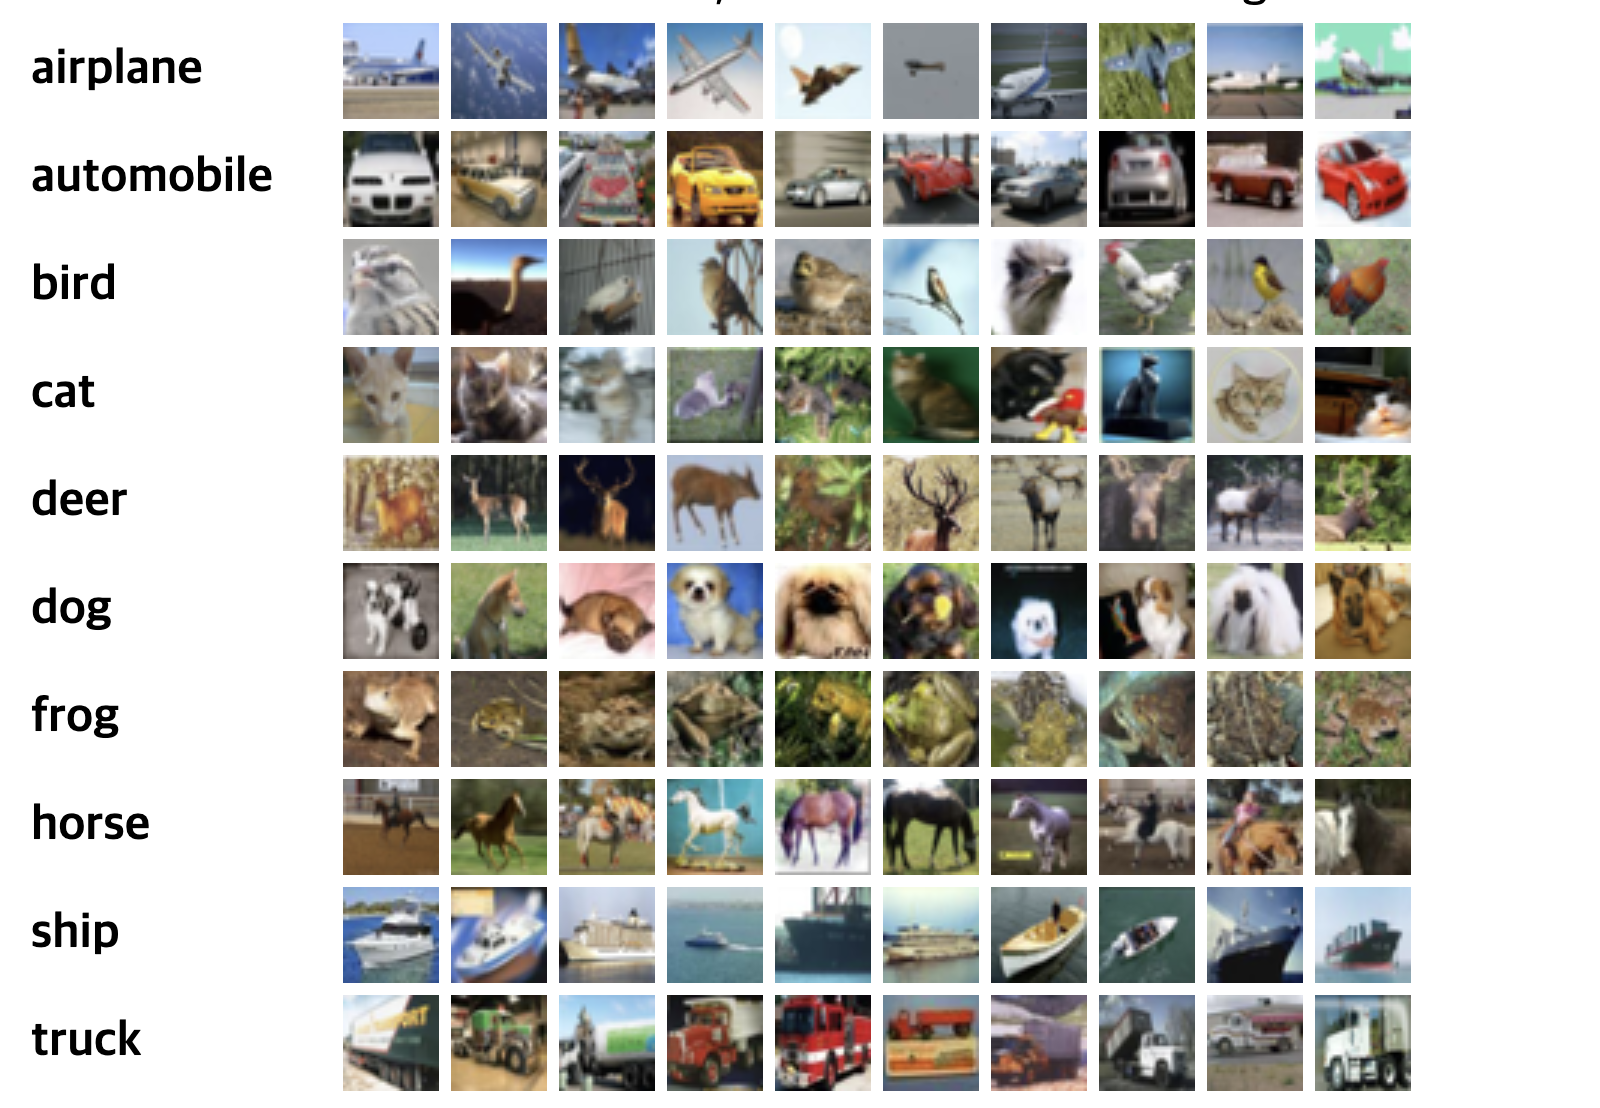

- 각 픽셀을 -1, 1로 정규화 하자.
- 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠준다.

In [7]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [8]:
train_x.shape
train_x[1]

array([[[ 0.20784314,  0.38823529,  0.46666667],
        [-0.01176471,  0.0745098 ,  0.06666667],
        [-0.17647059, -0.18431373, -0.25490196],
        ...,
        [-0.28627451, -0.25490196, -0.44313725],
        [-0.31764706, -0.29411765, -0.44313725],
        [-0.38039216, -0.36470588, -0.45098039]],

       [[ 0.09803922,  0.25490196,  0.3254902 ],
        [ 0.1372549 ,  0.2       ,  0.20784314],
        [-0.01960784, -0.01960784, -0.0745098 ],
        ...,
        [-0.24705882, -0.22352941, -0.38823529],
        [-0.39607843, -0.37254902, -0.51372549],
        [-0.44313725, -0.42745098, -0.52156863]],

       [[ 0.09803922,  0.21568627,  0.28627451],
        [ 0.09019608,  0.14509804,  0.16862745],
        [-0.09803922, -0.09803922, -0.12156863],
        ...,
        [-0.38039216, -0.35686275, -0.49803922],
        [-0.46666667, -0.45098039, -0.56862745],
        [-0.4745098 , -0.45882353, -0.56862745]],

       ...,

       [[ 0.37254902,  0.30980392,  0.30196078],
        [ 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


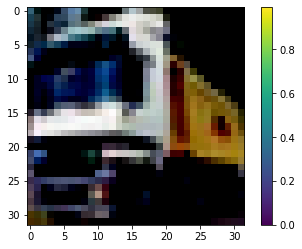

In [9]:
plt.imshow(train_x[1].reshape(32, 32, 3))
plt.colorbar()
plt.show()

- 정규화 후 이미지 확인
    - 1과 1사이의 값들로 변경되어 다양한 컬러 표현 불가
    - 이것은 0 이하의 값들은 모두 검은색으로 처리 된 것으로 판단된다.

- 이제 데이터에 대한 전처리는 모두 마쳤다!
___

- 정리된 데이터를 매번 모델에게 직접 섞어서 넣어주지 않고 편하게 사용할 수 있도록 
- 텐서플로우의 `Dataset`을 이용해 준비해보자.

In [10]:
BUFFER_SIZE = 100000
BATCH_SIZE = 512

- `BUFFER_SIZE`은 전체 데이터를 섞기 위해 60,000으로 설정
- `BATCH_SIZE`는 모델이 한 번에 학습할 데이터의 양
    - 변경 가능한 하이퍼 파라미터 값으로 `미니 배치 학습`이 잘 되도록 적절히 조정해 보자.


- 아래 `shuffle()` 함수에 대하여  
    - 데이터 세트의 요소를 무작위로 섞는다.
    - 버퍼를 요소로 채운 다음 이 버퍼에서 요소를 무작위로 샘플링하여 선택한 요소를 새 요소로 바꾼다.
    - **완벽한 셔플링**을 위해서는 **데이터 세트의 전체 크기보다 크거나 같은 버퍼 크기가 필요**하다.
    - [텐서플로우 공식 문서: tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

- tf.data.Dataset 모듈의 `from_tensor_slices()` 함수에 대하여
    - 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다.
    - 위 코드는 `train_x`라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나눈다.

### STEP 3. 생성자 모델 구현하기
___


- 본 프로젝트에서 구현해 볼 모델
- `DCGAN(Deep Convolutional GAN)`
    - Deep Convolutional Generatice Adversarial Network의 약자로, 
    - GAN을 개선시키고 거기에 Convolution을 적용한 모델. [출처][미미로그](https://memesoo99.tistory.com/32)

    - GAN의 개념이 처음 소개된 1년 반 이후 발표된 논문
    - 이전의 GAN을 더욱 발전시켜서 훨씬 그럴듯한 고화질 이미지 생성을 이루어낸 첫 번째 논문으로 평가
    - 이후 발표된 수많은 GAN 기반 이미지 생성 모델들은 대부분 DCGAN 모델을 발전시킨 형태





- 모델 구현은 Keras `Sequential` API를 활용
- 이후 소개하는 코드는 [Tensorflow 2.0 Tutorial](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)의 DCGAN 구현을 기반으로 한다.


In [12]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization(momentum=0.9))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Second: Reshape layer : 4
    model.add(layers.Reshape((4, 4, 256)))

    # Third: Conv2DTranspose layer : 4
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization(momentum=0.9))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Fourth: Conv2DTranspose layer : 8
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization(momentum=0.9))
    model.add(layers.LeakyReLU(alpha=0.2))

    # add_Fourth: Conv2DTranspose layer : 16
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization(momentum=0.9))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

- `make_generator_model` 함수 정의하여 생성자를 생성
    1. `tf.keras.Sequential()`로 레이어를 쌓아준다.
    2. `Conv2DTranspose` 레이어가 중요하다.
        - `Conv2DTranspose` 층은 이미지 사이즈를 넓혀주는 층
        - 4 번의 `Conv2DTranspose` 층을 이용해
        - `(4, 4, 128) → (8, 8, 128) → (16, 16, 128) → (32, 32, 3)` 순으로 이미지를 키운다.
        - 최종 사이즈인 (32, 32, 3)은 데이터셋과 형상이 동일하다.

        - [What is Transposed Convolutional Layer?](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)

    3. `BatchNormalization` 레이어는 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화
    4. 활성화 함수는 모두 `LeakyReLU`를 사용하였습니다.
    5. 마지막 층에는 활성화 함수로 `tanh`를 사용
        - 이것은 -1 ~ 1 이내의 값으로 픽셀 값을 정규화시켰던 데이터셋과 동일하게 하기 위한 것이다.

    - [Batch Normalization](https://eehoeskrap.tistory.com/430)

    - [활성화 함수 (activation function)](https://newly0513.tistory.com/20)


- 생성 모델을 `generator`라는 변수로 생성 후 모델 `summary`를 출력해보자.


In [13]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              409600    
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 128)         294912    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 128)         0

- `shape=(1, 100)` 형상의 랜덤 노이즈 벡터 생성하여 결과물을 만들어 보자. 

- `tf.random.normal`을 이용하여 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터를 만들자.

In [14]:
noise = tf.random.normal([1, 100])

- 텐서플로우 2.0 이후 버전
    - 레이어와 모델에 call 메소드를 구현
    - 방금 만들어진 생성자 모델에 입력값으로 노이즈를 넣고
    - 바로 모델을 호출하면 간단히 결과 이미지가 생성
        - 내부적으로는 생성자의 **call** 함수가 호출


- 지금은 학습하는 중이 아니니 `training=False`를 설정해 주자.
    - `Batch Normalization` 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기에
    - `training=False`을 주어야 올바른 결과를 얻을 수 있다.

In [15]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

- 첫 번째 1은 1개(batch_size=1)라는 뜻
- 그 뒤로는 (32, 32, 3) 사이즈 이미지가 잘 생성되었다.

- 이미지를 확인해 보자
    - `matplotlib` 라이브러리는 2차원 이미지만 보여줄 수 있기에
    - 0번째와 3번째 축의 인덱스를 0으로 설정해서 `(32, 32)` shape의 이미지를 꺼내보자.

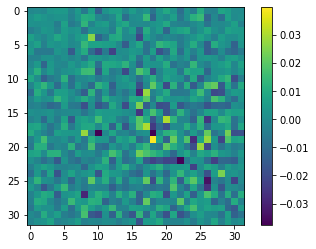

In [16]:
plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

- -1과 1 사이의 값 사이에 잘 생성된 것을 확인


### STEP 4. 판별자 모델 구현하기
___

- 판별자 모델 구현 함수
    - (32, 32, 3)의 이미지를 입력으로 받아 1dim의 판별결과를 출력하는 함수
    - 위에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인해보자.


In [17]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    # add_Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    # add_Second: Conv2D Layer
    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Third: Flatten Layer
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))  # add Dropout(0.4)

    # Fourth: Dense Layer
    model.add(layers.Dense(1, activation='sigmoid'))  # add activation

    return model

- `make_discriminator_model` 함수로 구현
    - `Conv2D` 층을 사용
        - 생성자와는 반대로 판별자는 `Conv2D` 층으로 이미지의 크기를 점점 줄여나간다.
        - 첫 번째 Conv2D 층에서 입력된 `[32, 32, 3]` 사이즈의 이미지는
        - 다음 층을 거치며 `(32, 32, 3) → (16, 16, 64) → (8, 8, 128)`까지 줄어든다.

    - 마지막에는 `Flatten` 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서
    - `8x8x128=8192`, 즉 `(1, 8192)` 형상의 벡터로 변환
    - 이는 생성자의 `Reshape` 층에서 1차원 벡터를 3차원으로 변환했던 것과 정확히 반대 역할을 한다.
    - 1차원 벡터로 변환한 후 마지막 `Dense Layer`를 거쳐 단 하나의 값을 출력

- 판별 모델을 `discriminator`라는 변수로 생성 후 모델 `summary`를 출력해 보자.

In [18]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)        

- 이제 가짜 이미지를 판별자에 입력시키서 바로 확인해 보자.

In [19]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.500119]], dtype=float32)>

- 아직은 아무런 의미가 없는 텐서플로우의 텐서 형태로 출력이 되었다.


### STEP 5. 손실함수와 최적화 함수 구현하기
___

- 생성자와 판별자의 손실함수(loss)를 구현

- 판별자의 출력값을 가지고 실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수 구현

- 생성자와 판별자를 최적화하는 optimizer 정의


### 손실함수(loss function)
___

1. GAN은 손실함수로 `Cross Entropy` 사용
    - 특히 판별자는 한 개의 이미지가 가짜인지 진짜인지 나타내는 2개 클래스 간 분류 문제
    - 이진 교차 엔트로피(binary cross entropy)를 사용


2. **생성자와 판별자의 목적**
    - 생성자 : 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이는 것
    - 판별자 : 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별하는 것이 목표


3. Real Image에 대한 라벨을 `1`, Fake Image에 대한 라벨을 `0`으로 두었을 때
    - 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표 결과
        - 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 **D(fake_image)** 값이 `1`에 가까워지는 것
        - 판별자 : Real Image 판별값, 즉 **D(real_image)**는 `1`에,
         Fake Image 판별값, 즉 **D(fake_image)**는 `0`에 가까워지는 것

    - 결국 손실함수에 들어가는 값은 모두 **판별자의 판별값**이 된다.
    - 이러한 기준으로 생성자, 판별자 각각에 대한 손실함수를 설계해 보자.
    

4. 손실함수에 사용할 교차 엔트로피 함수는 `tf.keras.losses` 라이브러리 안에 있다.
    - 다만, 교차 엔트로피를 계산하기 위해 입력할 값은 판별자가 판별한 값
    - 판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 활성화 함수가 없다.
    - 즉, 판별자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있다.
    - 그런데 `tf.keras.losses`의 `BinaryCrossEntropy` 클래스
        - 들어오는 인풋값이 0 ~ 1 사이에 분포하는 확률값이라고 가정한다.([참고](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy#args_1))
        - 따라서 `from_logits`를 `True`로 설정해 주어야
        - `BinaryCrossEntropy`에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해
        - 0 ~ 1 사이의 값으로 정규화한 후 알맞게 계산할 수 있다.



In [20]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

- `cross_entropy`를 활용해 계산할 loss들
    - `fake_output`와 `real_output`, 두 가지를 활용

- **fake_output** : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 **D(fake_image)**

- **real_output** : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 **D(real_image)**

- `fake_output`과 `real_output`을 각각 1 또는 0에 비교
    - `tf.ones_like()`와 `tf.zeros_like()` 함수를 활용
    - 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 채워진 벡터를 만들고 싶을 때 사용

### generator_loss

- `generator_loss`는 `fake_output`이 1에 가까워지기를 바라므로,
- `cross_entropy(tf.ones_like(fake_output), fake_output)` 값은
- fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가진다.

In [21]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### discriminator_loss

- `discriminator_loss`는 `real_output` 값은 1에 가까워지기를,
- `fake_output` 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산
    - `real_output`은 1로 채워진 벡터
    - `fake_output`은 0으로 채워진 벡터와 비교

- 최종 `discriminator_loss` 값은 이 둘을 더한 값이다.

In [22]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### discriminator accuracy

- 판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산해보는 것이 매우 중요
- 특히 두 accuracy를 따로 계산해서 비교해 보는 것이 매우 유용하다.

- 판별자가 real output과 fake output을 accuracy가 1.0에 가까울 정도로 정확하게 판별해 내는 것은 좋지않다.
- 이것은 생성자가 만들어내는 fake output이 real output과 차이가 많이 나서 판별자가 매우 쉽게 판별해 낸다는 것.

- real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 둘 다 0.5에 가까워지는 것이 이상적이다.
- fake accuracy가 1.0에 더 가깝다면 생성자가 판별자를 잘 속이지 못하고 있다는 뜻이다.

In [23]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

- 위에서 사용된 tensorflow 함수들의 역할

    ex.) real_output = tf.Tensor([0.2, 0.4, 0.7, 0.9]) 라면,

    - (1) tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별 - >> **tf.Tensor([False, False, True, True])**

    - (2) tf.cast( (1), tf.float32) : (1)의 결과가 True이면 1.0, False이면 0.0으로 변환 - >> **tf.Tensor([0.0, 0.0, 1.0, 1.0])**

    - (3) tf.reduce_mean( (2)) : (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산 - >> **0.5**


### 최적화 함수(optimizer)
___

- 최적화 함수를 **Adam 최적화 기법** 을 활용해 보자.
    - [문과생도 이해하는 딥러닝 (8) - 신경망 학습 최적화](https://sacko.tistory.com/42)

- Adam 함수도 `tf.keras.optimizers` 안에 있다.  
    - 중요한 하이퍼 파라미터인 "learning rate"
        - generator : 0.002
        - discriminator : 0.0002 로 설정
    - 학습 품질을 올려보고 싶다면 여러 가지로 값을 바꾸어 가며 학습을 진행해 보자.

- 중요한 점
    - 생성자와 구분자는 따로따로 학습을 진행하는 개별 네트워크이기 때문에
    - optimizer를 따로 만들어주어야 한다는 점이다.



In [24]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

- 매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인
    - 샘플은 한 번에 16장을 생성
    - 샘플은 매번 같은 노이즈로 생성해야 그에 대한 진전 과정을 확인할 수 있다.
    - 고정된 seed 노이즈를 아래와 같이 만들어두자.
    - 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터

In [25]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

### STEP 6. 훈련과정 상세 기능 구현하기
___

- 1개 미니배치의 훈련 과정을 처리하는 **train_step()** 함수 구현

- 16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 **generate_and_save_images()** 함수 구현

- 훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 **draw_train_history()** 함수 구현

- **training_checkpoints** 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정


- 훈련을 위한 코드를 만들어 보자.

1. 하나의 미니 배치 당 진행할 `train_step` 함수를 먼저 만들자.
    - 학습시킬 훈련 함수 위에 `@tf.function` 이라는 데코레이터를 붙여서 사용
    - 이 데코레이터는 직접 session을 열어서 학습했다가, 학습이 완료되면 다시 닫아주는 등의 번거로운 과정을 내부적으로 처리

    - [python decorator (데코레이터) 어렵지 않아요](https://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-decorator/)
    
    - `@tf.function` 이 정확히 어떤 역할을 해주는 것인지 아래 링크를 참조하자.
    - [Tensorflow Tutorial](https://www.tensorflow.org/api_docs/python/tf/function)


아래 두 코드를 실행해 보면 위 정의의 의미가 명확해질 것 같다.


In [26]:
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [27]:
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

- Numpy array 입력 x, y를 동일하게 사용했지만 f(x,y)의 결과 타입은 다르다.
- `@tf.function` 데코레이터가 사용된 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동 변환
- 알아두면 향후 Tensorflow 모델 구현에 매우 편리하게 사용할 수 있을 것 같다.

In [28]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

- `train_step` 함수를 하나하나 뜯어보면 다음과 같습니다.

    - (1) 입력 데이터 : Real Image 역할을 할 `images` 한 세트를 입력으로 받음  
    - (2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 `noise`를 `images` 한 세트와 같은 크기인 `BATCH_SIZE` 만큼 생성함  
    - (3) `tf.GradientTape()`는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 `with` 구문 열기  
    - (4) generated_images 생성 : generator가 `noise`를 입력받은 후 `generated_images` 생성  
    - (5) discriminator 판별 : discriminator가 Real Image인 `images`와 Fake Image인 `generated_images`를 각각 입력받은 후 `real_output`, `fake_output` 출력  
    - (6) loss 계산 : `fake_output`, `real_output`으로 generator와 discriminator 각각의 loss 계산  
    - (7) accuracy 계산 : `fake_output`, `real_output`으로 discriminator의 정확도 계산  
    - (8) gradient 계산 : `gen_tape`와 `disc_tape`를 활용해 gradient를 자동으로 계산  
    - (9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신  
    - (10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴  


- 위와 같은 일련의 과정을 통해 한 번의 train_step이 끝나게 된다.

- 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 만들어 보자.  
- 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인할 수 있다.  


In [29]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(np.array(predictions[i, :, :, :]*127.5 + 127.5).astype('uint8')) # 정규화 전으로 변환
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

- model이 16개의 seed가 들어있는 `sample_seeds`를 입력받아서 만들어낸 `prediction`을
- matplotlib으로 시각화해주는 과정이 담겨 있다.

- subplot을 이용해서 총 16개의 sample을 시각화하는 과정이다.  
    - 16개이므로 4행 4열로 나누어 `subplot(4, 4, i+1)`로 시각화하는 것이다.
    - `plt`에 저장되어 보이는 이미지를 `plt.savefig`로 간단히 파일로 저장한다.

- 학습 과정을 체크하기 위해 시각화해 보아야 할 중요한 것
    - loss와 accuracy 그래프 확인
    - 이것은 두 모델이 서로의 학습 과정에 영향을 주고받기 때문
    - `train_step()` 함수가 리턴하는 `gen_loss`, `disc_loss`, `real_accuracy`, `fake_accuracy`
    - 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 
    - 매 epoch마다 시각화하는 함수를 만들어 보자.
    - 예를 들어 생성자의 loss의 history는 `history['gen_loss']`로 접근할 수 있는 list로 관리하자.


In [30]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

- 정기적으로 모델을 저장하기 위한 checkpoint를 만들어주자.

- `tf.train.Checkpoint`를 활용하면 매번 모델을 직접 저장해 주지 않아된다.
- 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있다.  

- 모델이 복잡해지고 학습 속도가 오래 걸릴수록, 모델에 대한 저장 및 버전 관리는 필수적이다.

- checkpoint에는 optimizer와 생성자, 판별자를 모두 넣어 저장한다.
- 정확히는 생성자와 판별자가 학습한 모델 가중치를 저장하는 것이다.
- 게임의 체크포인트처럼 학습 환경과 학습한 내용을 저장해 둔다.

- checkpoint 모델을 저장하기 위해 `training_checkpoints` 라는 디렉토리를 사용하자.



In [31]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### STEP 7. 학습 과정 진행하기
___

- 위 STEP 5에서 구현한 기능들을 활용하여 최소 50 epoch만큼의 모델 학습을 진행해 보자.

- 학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현해 보자.


- 학습 시키기
    - 한 단계를 학습하는 `train_step`
    - 샘플 이미지를 생성하고 저장하기 위한 `generate_and_save_images()`
    - 학습 과정을 시각화하는 `draw_train_history()`
    - 모델까지 저장하기 위한 `checkpoint`까지 모두 준비
    
- 이것들을 한곳에 합쳐서 한번 확인해 보자!


In [32]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

- 모델을 저장하는 간격을 담당하는 `save_every`
- 전체 학습 에포크를 결정하는 `EPOCHS` 파라미터 설정 후 훈련!


In [33]:
save_every = 5
EPOCHS = 300

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

- GAN 학습이 드디어 시작된다!!

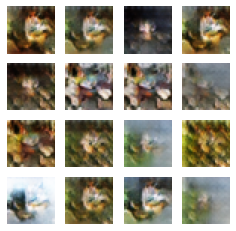

Time for training : 7701 sec


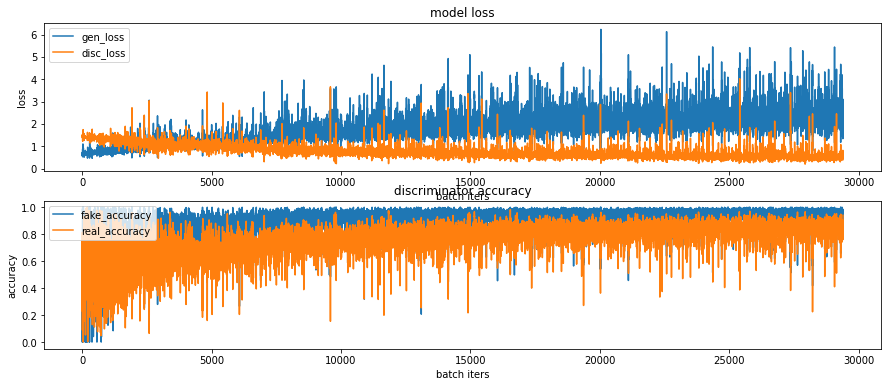

CPU times: user 2h 8min 45s, sys: 5min 58s, total: 2h 14min 44s
Wall time: 2h 8min 23s


In [34]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/cifar10/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

### 학습과정 시각화하기
___

- 생성했던 샘플 이미지들을 합쳐 GIF 파일, 일명 움짤로 만들어 보자.

- GIF 파일은 import 해놓았던 imageio 라이브러리를 활용해 만들 수 있다.
- imageio.get_writer를 활용해서 파일을 열고, 거기에 append_data로 이미지를 하나씩 붙여나가는 방식이다.


In [36]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/b_up_gan3/generated_samples/cifar10_gan_samples.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/b_up_gan3/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/b_up_gan3/generated_samples/cifar10_gan_samples.gif

-rw-r--r-- 1 root root 1755090 Feb 15 06:46 /aiffel/aiffel/dcgan_newimage/cifar10/b_up_gan3/generated_samples/cifar10_gan_samples.gif


In [ ]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/b_up_gan3/training_history/cifar10_gan_history.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/b_up_gan3/training_history/train*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/b_up_gan3/training_history/cifar10_gan_history.gif

![cifar10_gan_03_samples](https://user-images.githubusercontent.com/96903618/154011101-de4630c9-feb8-4b6d-aa85-287df0ebcd06.gif)

![cifar10_gan_03_history](https://user-images.githubusercontent.com/96903618/154011120-5fde7e89-bb4f-44ca-a45e-11b56065e68a.gif)

### STEP 8. (optional) GAN 훈련 과정 개선하기
___

- [How to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks)

- [10 Lessons I Learned Training GANs for one Year](https://towardsdatascience.com/10-lessons-i-learned-training-generative-adversarial-networks-gans-for-a-year-c9071159628)

- [Tips for Training Stable Generative Adversarial Networks](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)

- [Improved Techniques for Training GANs(paper)](https://proceedings.neurips.cc/paper/2016/file/8a3363abe792db2d8761d6403605aeb7-Paper.pdf)


- github load 후 방법
<img alt="cifar" src="https://github.com/ai-castlemoney/AIFFEL_Project/blob/master/exploration_10/gif/cifar10_gan_03.gif?raw=true">

- github issue 활용한 방법
![cifar10_gan_03](https://user-images.githubusercontent.com/96903618/154008423-9307add8-3985-4a38-ba6f-b369847660a0.gif)